In [12]:
import os
import cv2
import numpy as np
import pandas as pd
from tqdm import tqdm
from imgaug import augmenters as iaa
import math
import string  


# Configuration
base_dir = "group_33_dataset"
output_csv = "group_33_augmented_dataset.csv"
target_samples_per_class = 200
max_original_samples = 25  # For balancing

# Augmentation pipeline
augmenter = iaa.Sequential([
    iaa.Affine(
        scale={"x": (0.9, 1.1), "y": (0.9, 1.1)},
        translate_px={"x": (-8, 8), "y": (-8, 8)},
        rotate=(-10, 10),
        shear=(-5, 5),
        order=1,
        mode='edge'
    ),
    iaa.ElasticTransformation(alpha=10, sigma=3),
    iaa.Sometimes(0.3, iaa.GaussianBlur(sigma=(0, 0.5))),
    iaa.Sometimes(0.2, iaa.AdditiveGaussianNoise(scale=0.02*255))
], random_order=True)

def batch_augment(images, n_times):
    return [augmenter.augment_image(img) for img in images for _ in range(n_times)]

# Label set: 0-9 + _a to _z + A-Z
labels_expected =  [f"_{ch}" for ch in string.ascii_lowercase] + [str(i) for i in range(10)] + list(string.ascii_uppercase)

# Initialize data
data = np.empty((0, 64 * 64), dtype=np.uint8)
labels = []

# Process each folder say in expected label order
for label in tqdm(labels_expected, desc="Processing labels"):
    label_dir = os.path.join(base_dir, label)
    if not os.path.isdir(label_dir):
        print(f"Skipping missing label folder: {label_dir}")
        continue

    image_files = [f for f in os.listdir(label_dir) if f.endswith(('.jpg', '.png'))][:max_original_samples]
    current_samples = len(image_files)
    if current_samples == 0:
        continue

    augment_per_image = math.ceil((target_samples_per_class - current_samples) / current_samples)
    class_images, class_labels = [], []

    for image_file in tqdm(image_files, desc=f"Processing {label}", leave=False):
        img_path = os.path.join(label_dir, image_file)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        if img is None:
            continue
        img = cv2.resize(img, (64, 64))
        class_images.append(img)
        class_labels.append(label)

    class_images = np.array(class_images)
    if augment_per_image > 0:
        augmented = batch_augment(class_images, augment_per_image)
        class_images = np.vstack([class_images, augmented])
        class_labels.extend([label] * len(augmented))

    flattened = class_images.reshape(len(class_images), -1)
    data = np.vstack([data, flattened])
    labels.extend(class_labels)
    del class_images, flattened

# Save to CSV in chunks
chunk_size = 10000
for i in tqdm(range(0, len(data), chunk_size), desc="Saving to CSV"):
    df = pd.DataFrame(data[i:i+chunk_size])
    df['label'] = labels[i:i+chunk_size]
    mode = 'w' if i == 0 else 'a'
    df.to_csv(output_csv, mode=mode, header=(i == 0), index=False)

# Final report
unique, counts = np.unique(labels, return_counts=True)
print("\nFinal class distribution:")
for lbl, count in zip(unique, counts):
    print(f"{lbl}: {count} samples")

Saving to CSV: 100%|█████████████████████████████████████████████████████████████████████| 2/2 [00:08<00:00,  4.47s/it]


Final class distribution:
0: 200 samples
1: 200 samples
2: 200 samples
3: 200 samples
4: 200 samples
5: 200 samples
6: 200 samples
7: 200 samples
8: 200 samples
9: 200 samples
A: 200 samples
B: 200 samples
C: 200 samples
D: 200 samples
E: 200 samples
F: 200 samples
G: 200 samples
H: 200 samples
I: 200 samples
J: 200 samples
K: 200 samples
L: 200 samples
M: 200 samples
N: 200 samples
O: 200 samples
P: 200 samples
Q: 200 samples
R: 200 samples
S: 200 samples
T: 200 samples
U: 200 samples
V: 216 samples
W: 200 samples
X: 200 samples
Y: 200 samples
Z: 200 samples
_a: 200 samples
_b: 200 samples
_c: 200 samples
_d: 200 samples
_e: 200 samples
_f: 200 samples
_g: 200 samples
_h: 200 samples
_i: 200 samples
_j: 200 samples
_k: 200 samples
_l: 200 samples
_m: 200 samples
_n: 200 samples
_o: 200 samples
_p: 200 samples
_q: 200 samples
_r: 200 samples
_s: 200 samples
_t: 200 samples
_u: 200 samples
_v: 200 samples
_w: 200 samples
_x: 200 samples
_y: 200 samples
_z: 200 samples


C:\Users\brajagopal\AppData\Local\Temp\ipykernel_30884\2727076754.py:14: DtypeWarning: Columns (4096) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("group_33_augmented_dataset.csv")


Epoch 1/30


C:\Users\brajagopal\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


156/156 ━━━━━━━━━━━━━━━━━━━━ 23s 128ms/step - accuracy: 0.0593 - loss: 3.9360 - val_accuracy: 0.2762 - val_loss: 3.0148
Epoch 2/30
156/156 ━━━━━━━━━━━━━━━━━━━━ 18s 114ms/step - accuracy: 0.2432 - loss: 2.9339 - val_accuracy: 0.5048 - val_loss: 1.9899
Epoch 3/30
156/156 ━━━━━━━━━━━━━━━━━━━━ 17s 106ms/step - accuracy: 0.4259 - loss: 2.1033 - val_accuracy: 0.6316 - val_loss: 1.4152
Epoch 4/30
156/156 ━━━━━━━━━━━━━━━━━━━━ 17s 112ms/step - accuracy: 0.5471 - loss: 1.5796 - val_accuracy: 0.7315 - val_loss: 1.0434
Epoch 5/30
156/156 ━━━━━━━━━━━━━━━━━━━━ 17s 109ms/step - accuracy: 0.6492 - loss: 1.2018 - val_accuracy: 0.7677 - val_loss: 0.8786
Epoch 6/30
156/156 ━━━━━━━━━━━━━━━━━━━━ 16s 103ms/step - accuracy: 0.6872 - loss: 1.0410 - val_accuracy: 0.7858 - val_loss: 0.7903
Epoch 7/30
156/156 ━━━━━━━━━━━━━━━━━━━━ 17s 111ms/step - accuracy: 0.7259 - loss: 0.8805 - val_accuracy: 0.8108 - val_loss: 0.6876
Epoch 8/30
156/156 ━━━━━━━━━━━━━━━━━━━━ 16s 101ms/step - accuracy: 0.7484 - loss: 0.8025 - val


✅ Final Test Accuracy: 0.8905
78/78 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step

Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        40
           1       0.90      0.93      0.91        40
           2       0.97      0.85      0.91        40
           3       0.82      0.80      0.81        40
           4       0.91      0.97      0.94        40
           5       0.84      0.78      0.81        40
           6       0.89      0.85      0.87        40
           7       0.85      0.85      0.85        40
           8       0.64      0.90      0.75        40
           9       0.68      0.70      0.69        40
           A       0.93      1.00      0.96        40
           B       0.69      0.82      0.75        40
           C       0.84      0.80      0.82        40
           D       0.89      0.82      0.86        40
           E       0.88      0.93      0.90        40
           F       0.95      0.97      0

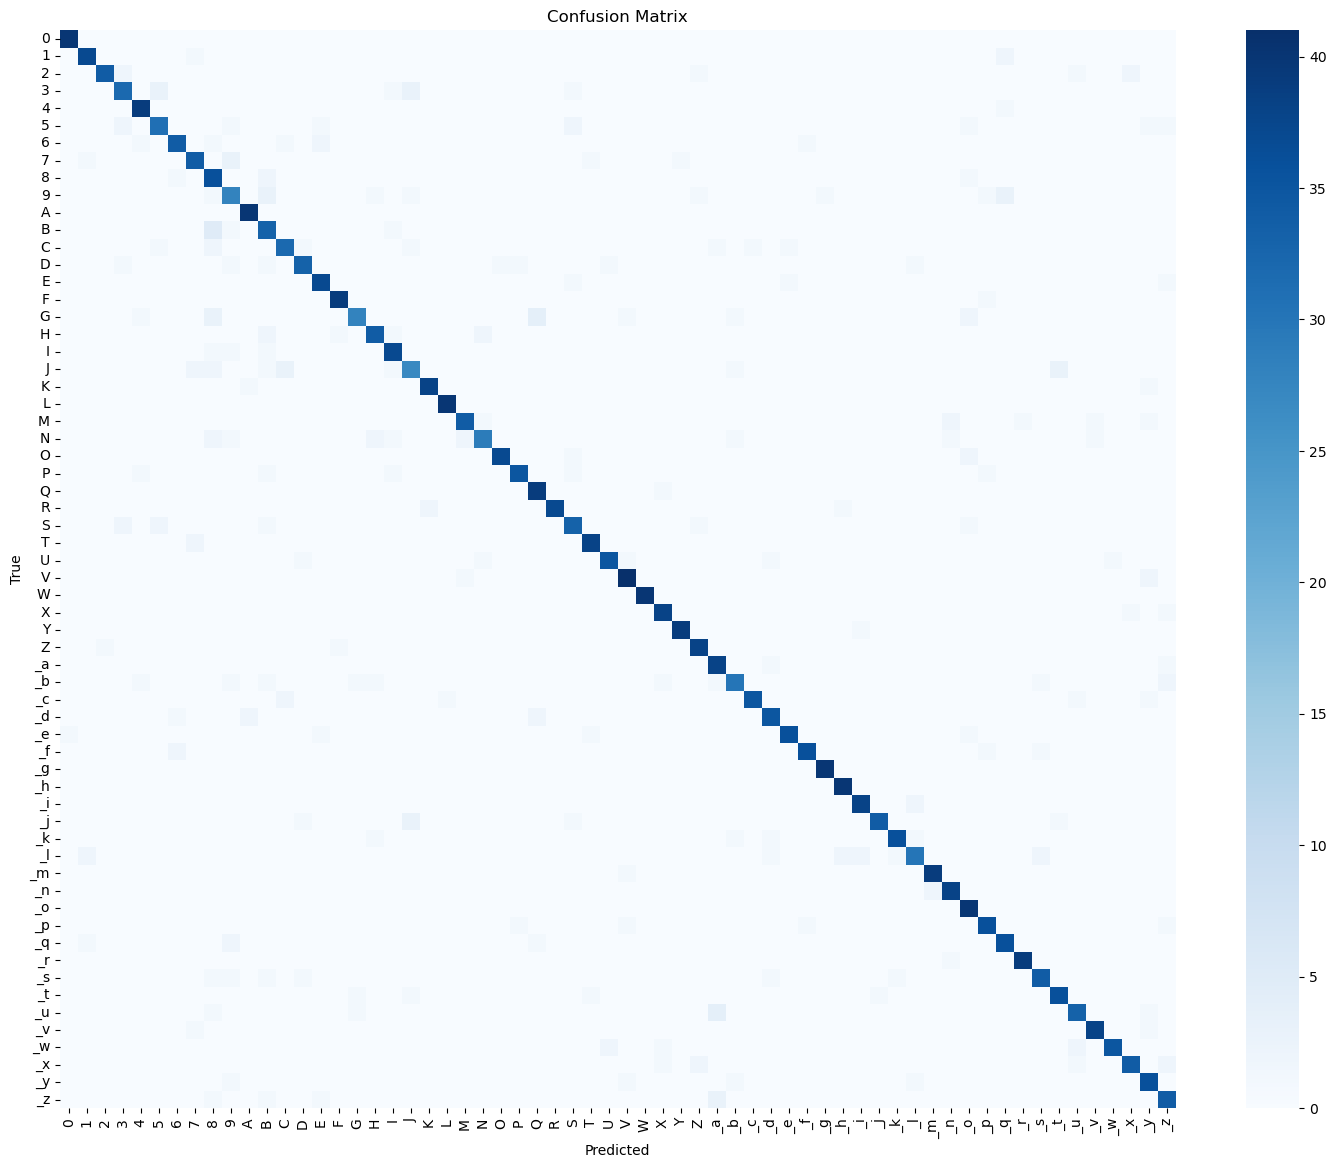

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import LabelEncoder

# Load dataset
df = pd.read_csv("group_33_augmented_dataset.csv")

# Ensure all labels are strings
df['label'] = df['label'].astype(str)

# Encode labels
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['label'] = le.fit_transform(df['label'])  # Now only strings

# Save mapping for later decoding
label_mapping = dict(zip(le.classes_, le.transform(le.classes_)))

# Split features and labels
X = df.drop(columns=["label"]).values.astype("float32")
y = df["label"]

# Normalize  say and reshape
X = X / 255.0
X = X.reshape(-1, 64, 64, 1)
y_cat = to_categorical(y, num_classes=62)

# Train-test split
X_train, X_test, y_train, y_test, y_train_raw, y_test_raw = train_test_split(
    X, y_cat, y, test_size=0.2, stratify=y, random_state=42
)

# Build optimized CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation="relu", input_shape=(64, 64, 1)),
    MaxPooling2D(2, 2),
    Dropout(0.25),

    Conv2D(64, (3, 3), activation="relu"),
    MaxPooling2D(2, 2),
    Dropout(0.25),

    Conv2D(128, (3, 3), activation="relu"),
    MaxPooling2D(2, 2),
    Dropout(0.3),

    Flatten(),
    Dense(256, activation="relu"),
    Dropout(0.4),
    Dense(62, activation="softmax")
])

# Compile model
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

# Early stopping
early_stop = EarlyStopping(monitor="val_loss", patience=5, restore_best_weights=True)

# Train the model
history = model.fit(
    X_train, y_train,
    epochs=30,
    batch_size=64,
    validation_data=(X_test, y_test),
    callbacks=[early_stop]
)

# Evaluate model
loss, acc = model.evaluate(X_test, y_test)
print(f"\n✅ Final Test Accuracy: {acc:.4f}")

# Save model and label mapping
model.save("group_33_augmented_model.h5")
pd.Series(label_mapping).to_csv("label_mapping.csv")

# Predictions and classification report
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

print("\nClassification Report:")
print(classification_report(y_test_raw, y_pred_classes, target_names=le.classes_))


# Confusion matrix
plt.figure(figsize=(18, 14))
cm = confusion_matrix(y_test_raw, y_pred_classes)
sns.heatmap(cm, annot=False, cmap="Blues", xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

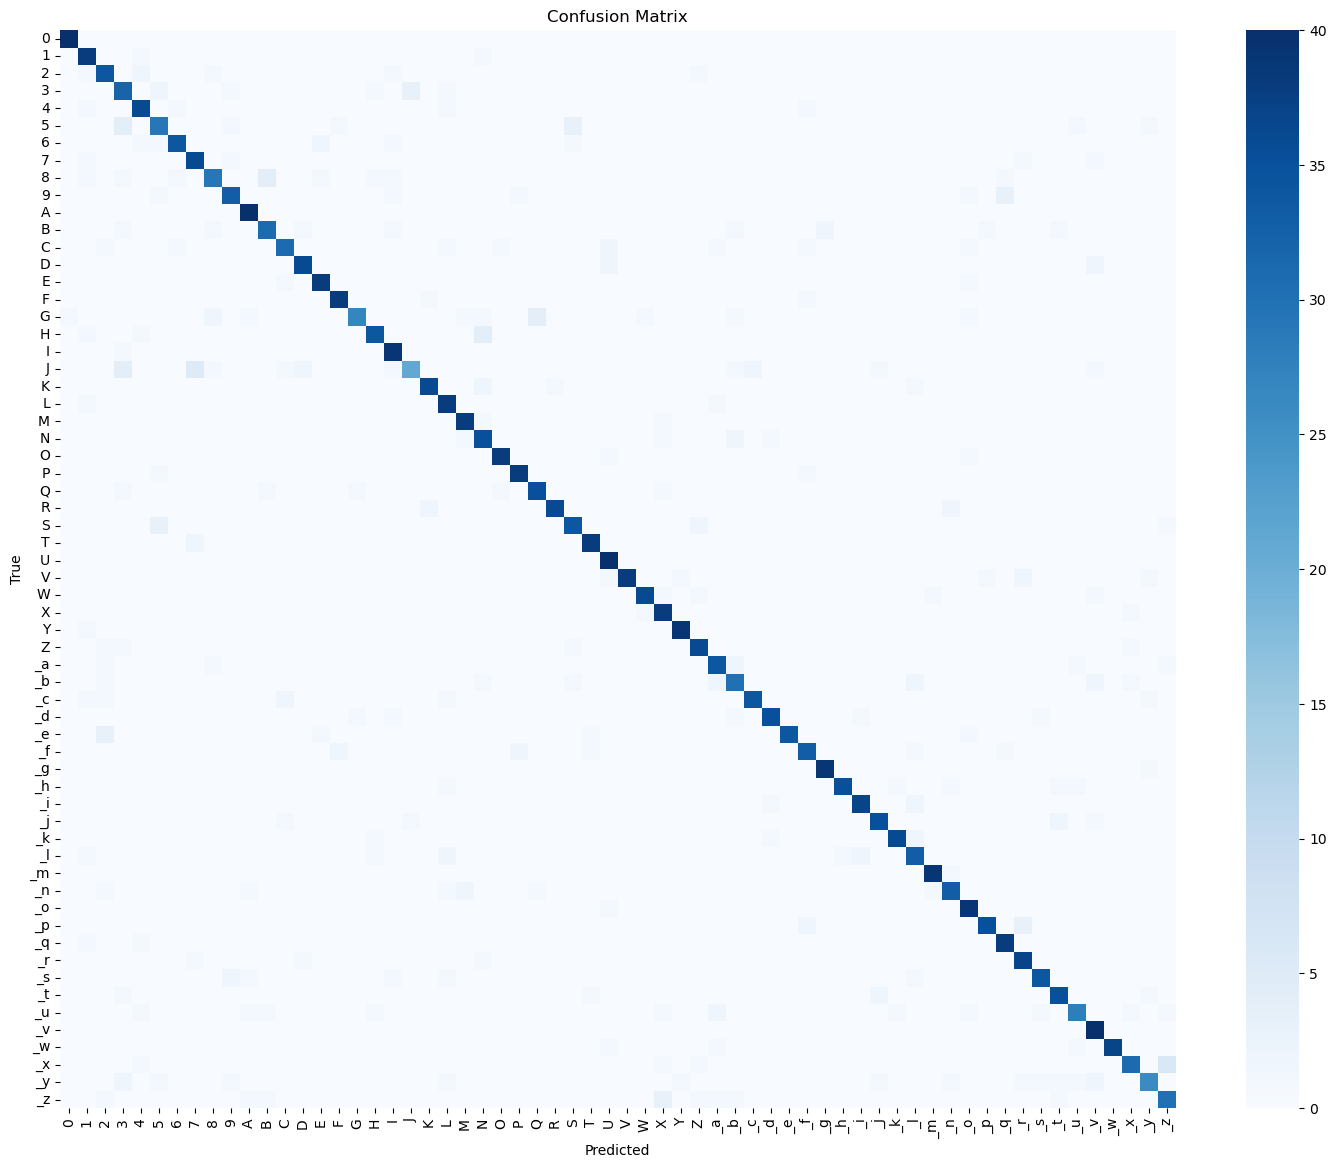

In [7]:
# Confusion matrix
plt.figure(figsize=(18, 14))
cm = confusion_matrix(y_test_raw, y_pred_classes)
sns.heatmap(cm, annot=False, cmap="Blues", xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

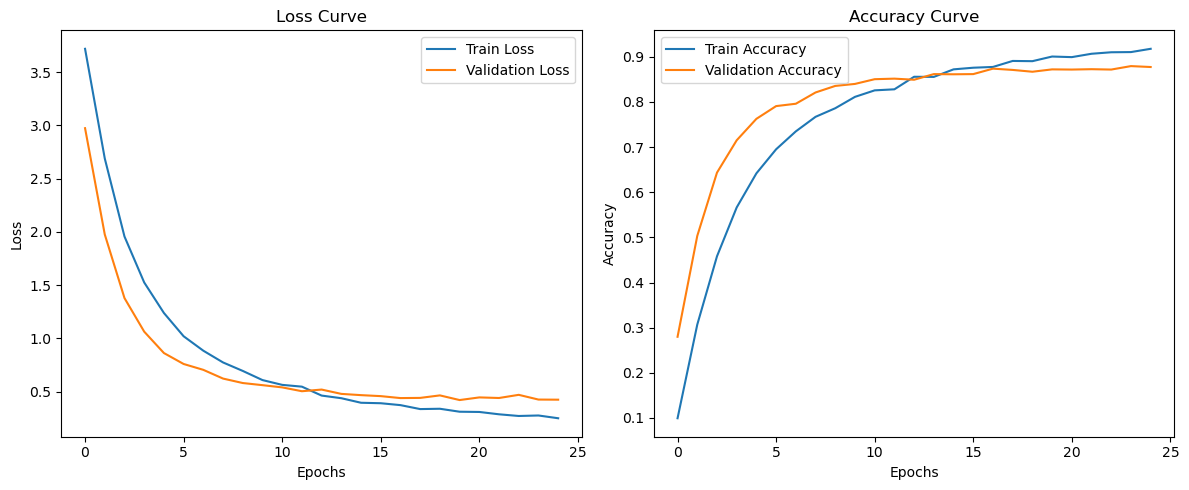

In [8]:
# Plot Training History
# ---------------------------
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Curve')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Curve')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [9]:
# Define the path to your saved model file
model_path = "group_33_augmented_model.h5" # Ensure this is the exact filename

# Load the model
try:
    loaded_model = load_model(model_path)
    print(f"Model loaded successfully from {model_path}")
    # Optional: Print summary to verify
    loaded_model.summary()
except Exception as e:
    print(f"Error loading model: {e}")
    loaded_model = None # Handle the case where loading fails

Model loaded successfully from group_33_augmented_model.h5


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 62, 62, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 31, 31, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 31, 31, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 29, 29, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 12, 12, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 6, 6, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 6, 6, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 4608)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 256)                 │       1,179,904 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 62)                  │          15,934 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,288,512 (4.92 MB)

 Trainable params: 1,288,510 (4.92 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

C:\Users\brajagopal\AppData\Local\Temp\ipykernel_30884\838545504.py:8: DtypeWarning: Columns (4096) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("group_33_augmented_dataset.csv")


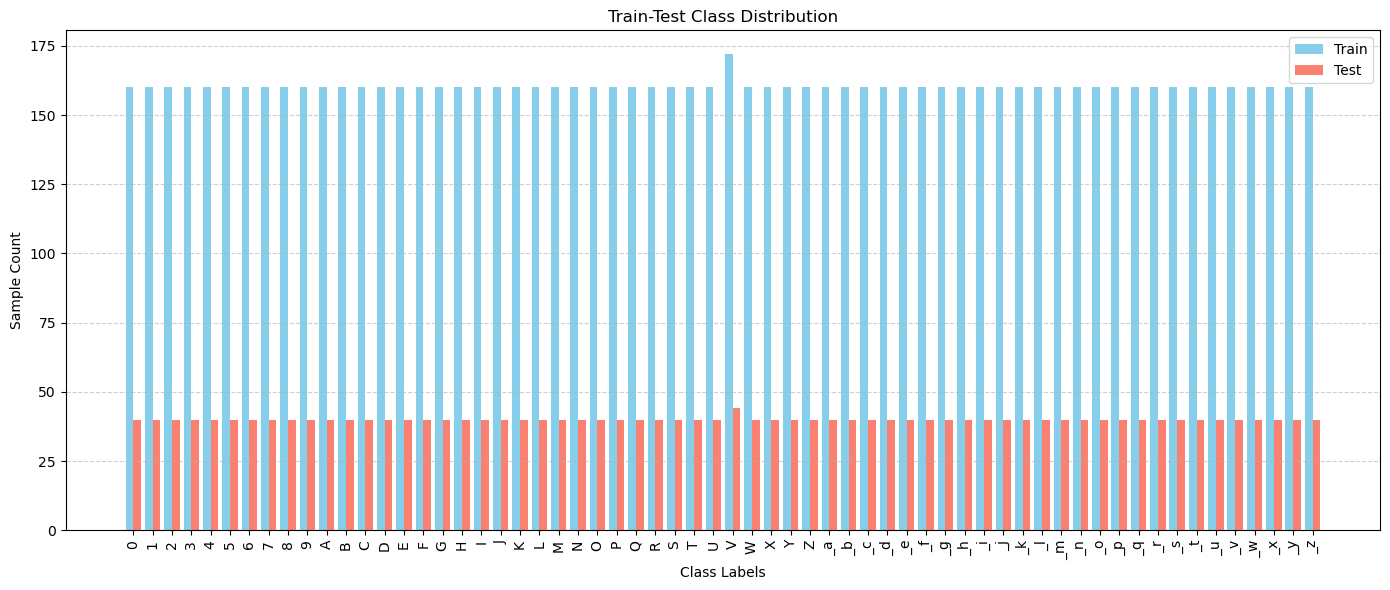

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

# Load your actual dataset (not label mapping)
df = pd.read_csv("group_33_augmented_dataset.csv")

# Ensure label is a string
df['label'] = df['label'].astype(str)

# Split into features and labels
X = df.drop(columns=['label'])
y = df['label']

# Train-test split (stratified)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, test_size=0.2, random_state=42
)

# Count distribution for both sets
train_counts = y_train.value_counts().sort_index()
test_counts = y_test.value_counts().sort_index()

# 📊 Bar chart for train-test distribution
plt.figure(figsize=(14, 6))
x = np.arange(len(train_counts))
bar_width = 0.4

plt.bar(x - bar_width/2, train_counts.values, bar_width, label='Train', color='skyblue')
plt.bar(x + bar_width/2, test_counts.values, bar_width, label='Test', color='salmon')

plt.xticks(ticks=x, labels=train_counts.index, rotation=90)
plt.xlabel("Class Labels")
plt.ylabel("Sample Count")
plt.title("Train-Test Class Distribution")
plt.legend()
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

In [16]:
import cv2
import numpy as np
from collections import deque
from tensorflow.keras.models import load_model
import mediapipe as mp
import string

# Load trained model
model = load_model("group_33_augmented_model.h5")
print(" CNN Model Loaded Successfully!")

# Mediapipe setup
mp_hands = mp.solutions.hands
hands = mp_hands.Hands(min_detection_confidence=0.7, min_tracking_confidence=0.7)
mp_drawing = mp.solutions.drawing_utils

# Drawing settings
drawing = False
canvas = None
trajectory = []
fingertip_coords = deque(maxlen=5)
prev_coords = None
last_prediction = None

# Gesture class names: 0–9, A–Z, _a–_z
classes = [str(i) for i in range(10)] + list(string.ascii_uppercase) + ['_' + c for c in string.ascii_lowercase]

# Smooth fingertip tracking
def smooth_coordinates(coord_queue, new_coord, max_len=5):
    coord_queue.append(new_coord)
    if len(coord_queue) > max_len:
        coord_queue.popleft()
    avg_x = int(np.mean([x for x, y in coord_queue]))
    avg_y = int(np.mean([y for x, y in coord_queue]))
    return avg_x, avg_y

# Webcam setup
cap = cv2.VideoCapture(0)

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        print("❌ Error: Unable to access camera.")
        break

    frame = cv2.flip(frame, 1)
    rgb_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    h, w, _ = frame.shape

    if canvas is None:
        canvas = np.zeros_like(frame)

    results = hands.process(rgb_frame)

    if results.multi_hand_landmarks:
        hand_landmarks = results.multi_hand_landmarks[0]
        fingertip = hand_landmarks.landmark[8]
        x, y = int(fingertip.x * w), int(fingertip.y * h)
        x, y = smooth_coordinates(fingertip_coords, (x, y))

        if drawing:
            trajectory.append((x, y))
            if prev_coords:
                cv2.line(canvas, prev_coords, (x, y), (255, 255, 255), thickness=5)
            prev_coords = (x, y)
        else:
            prev_coords = None

        mp_drawing.draw_landmarks(frame, hand_landmarks, mp_hands.HAND_CONNECTIONS)

    # If a prediction exists, show it on canvas (bottom-left corner)
    if last_prediction:
        label, confidence = last_prediction
        display_text = f"{label} - {confidence:.1f}%"
        text_size, _ = cv2.getTextSize(display_text, cv2.FONT_HERSHEY_SIMPLEX, 1.2, 3)
        text_x = 30
        text_y = h - 30
        cv2.putText(canvas, display_text, (text_x, text_y), cv2.FONT_HERSHEY_SIMPLEX,
                    1.2, (0, 255, 255), 3)

    # Merge frame and canvas
    combined = cv2.addWeighted(frame, 0.5, canvas, 0.5, 0)

    # UI instructions
    cv2.putText(combined, "D - Toggle Drawing", (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 255, 0), 2)
    cv2.putText(combined, "C - Clear Canvas", (10, 60), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 255, 0), 2)
    cv2.putText(combined, "P - Predict", (10, 90), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 255, 0), 2)
    cv2.putText(combined, "Q - Quit", (10, 120), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 255, 0), 2)

    key = cv2.waitKey(1) & 0xFF
    if key == ord('d'):
        drawing = not drawing
        print(" Drawing mode:", "ON" if drawing else "OFF")
    elif key == ord('c'):
        canvas = np.zeros_like(frame)
        trajectory.clear()
        last_prediction = None
        print(" Canvas cleared.")
    elif key == ord('p'):
        if len(trajectory) > 1:
            motion_image = np.zeros((480, 640), dtype=np.uint8)
            for (x, y) in trajectory:
                cv2.circle(motion_image, (x, y), 3, 255, -1)

            input_img = cv2.resize(motion_image, (64, 64))
            input_img = input_img.astype("float32") / 255.0
            input_img = np.expand_dims(input_img, axis=(0, -1))

            prediction = model.predict(input_img, verbose=0)
            pred_class = np.argmax(prediction)
            pred_label = classes[pred_class]
            confidence = float(np.max(prediction)) * 100

            display_label = pred_label[1:] if pred_label.startswith("_") else pred_label
            last_prediction = (display_label, confidence)

            print(f" Predicted: {display_label} - {confidence:.1f}%")
            trajectory.clear()
        else:
            print("Please draw a gesture before predicting.")
    elif key == ord('q'):
        print(" Exiting.")
        break

    cv2.imshow("Air-Writing Recognition", combined)

cap.release()
cv2.destroyAllWindows()


 CNN Model Loaded Successfully!
 Drawing mode: ON
 Drawing mode: OFF
 Predicted: 2 - 100.0%
 Canvas cleared.
 Drawing mode: ON
 Drawing mode: OFF
 Predicted: 3 - 75.1%
 Canvas cleared.
 Drawing mode: ON
 Drawing mode: OFF
 Predicted: 4 - 98.3%
 Canvas cleared.
 Drawing mode: ON
 Drawing mode: OFF
 Predicted: q - 81.7%
 Canvas cleared.
 Drawing mode: ON
 Drawing mode: OFF
 Predicted: 5 - 100.0%
 Canvas cleared.
 Drawing mode: ON
 Drawing mode: OFF
 Predicted: 6 - 99.9%
 Canvas cleared.
 Drawing mode: ON
 Drawing mode: OFF
 Drawing mode: ON
 Drawing mode: OFF
 Predicted: 7 - 100.0%
 Canvas cleared.
 Drawing mode: ON
 Drawing mode: OFF
 Predicted: 8 - 95.6%
 Canvas cleared.
 Drawing mode: ON
 Drawing mode: OFF
 Predicted: 9 - 100.0%
 Canvas cleared.
 Drawing mode: ON
 Drawing mode: OFF
 Predicted: A - 99.8%
 Canvas cleared.
 Drawing mode: ON
 Drawing mode: OFF
 Predicted: 8 - 97.8%
 Canvas cleared.
 Drawing mode: ON
 Drawing mode: OFF
 Predicted: 9 - 67.7%
 Canvas cleared.
 Drawing mode: 